In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('WineQT.csv')

# Display the first few rows and basic statistics
print(df.head())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [4]:
# Define features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train Ridge Regression model
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

# Train Lasso Regression model
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)


In [6]:
# Evaluate Ridge Regression model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Evaluate Lasso Regression model
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Ridge Regression MSE: {ridge_mse}, R²: {ridge_r2}')
print(f'Lasso Regression MSE: {lasso_mse}, R²: {lasso_r2}')

Ridge Regression MSE: 0.3822807848629102, R²: 0.3130290371120601
Lasso Regression MSE: 0.556481594138102, R²: -1.5464265512799003e-05


In [7]:
# Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Hyperparameter tuning for Lasso Regression
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print(f'Best Ridge alpha: {ridge_cv.best_params_}')
print(f'Best Lasso alpha: {lasso_cv.best_params_}')

Best Ridge alpha: {'alpha': 10}
Best Lasso alpha: {'alpha': 0.1}


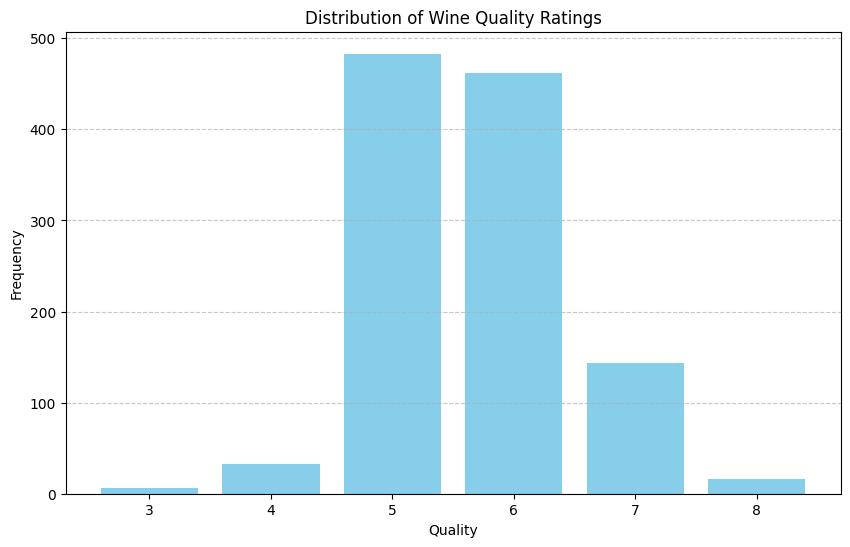

In [8]:
# Plot the distribution of the 'quality' column as a bar graph
quality_counts = df['quality'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(quality_counts.index, quality_counts.values, color='skyblue')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality Ratings')
plt.xticks(quality_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()